
 Welcome to Koushal's Crop & Fertilizer Recommendation System 
1: Enter the Crop Name to get Environmental Requirements
2: Enter Environmental Conditions to get the best Crop & Fertilizer Recommendations
3: View Graphical Representation of Features vs Label
4: Exit the System

Enter your choice (1, 2, 3, or 4): 1

Enter the Crop Name (e.g.,rice,maize): mango

 Required Environmental Conditions for mango:
 - Nitrogen (N): 20.07
 - Phosphorous (P): 27.18
 - Potassium (K): 29.92
 - Temperature (°C): 31.21
 - Humidity (%): 50.16
 - pH: 5.77
 - Rainfall (mm): 94.70

 Welcome to Koushal's Crop & Fertilizer Recommendation System 
1: Enter the Crop Name to get Environmental Requirements
2: Enter Environmental Conditions to get the best Crop & Fertilizer Recommendations
3: View Graphical Representation of Features vs Label
4: Exit the System

Enter your choice (1, 2, 3, or 4): 2

---- Enter the Environmental Conditions ----
Enter Nitrogen (N) value: 20
Enter Phosphorous (P) value: 27
Enter Pot

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



 Best Recommended Crop: mango
 Growth Suitability accuracy: 96.14%
 Recommended Fertilizer: 20-20

 Welcome to Koushal's Crop & Fertilizer Recommendation System 
1: Enter the Crop Name to get Environmental Requirements
2: Enter Environmental Conditions to get the best Crop & Fertilizer Recommendations
3: View Graphical Representation of Features vs Label
4: Exit the System

Enter your choice (1, 2, 3, or 4): 3


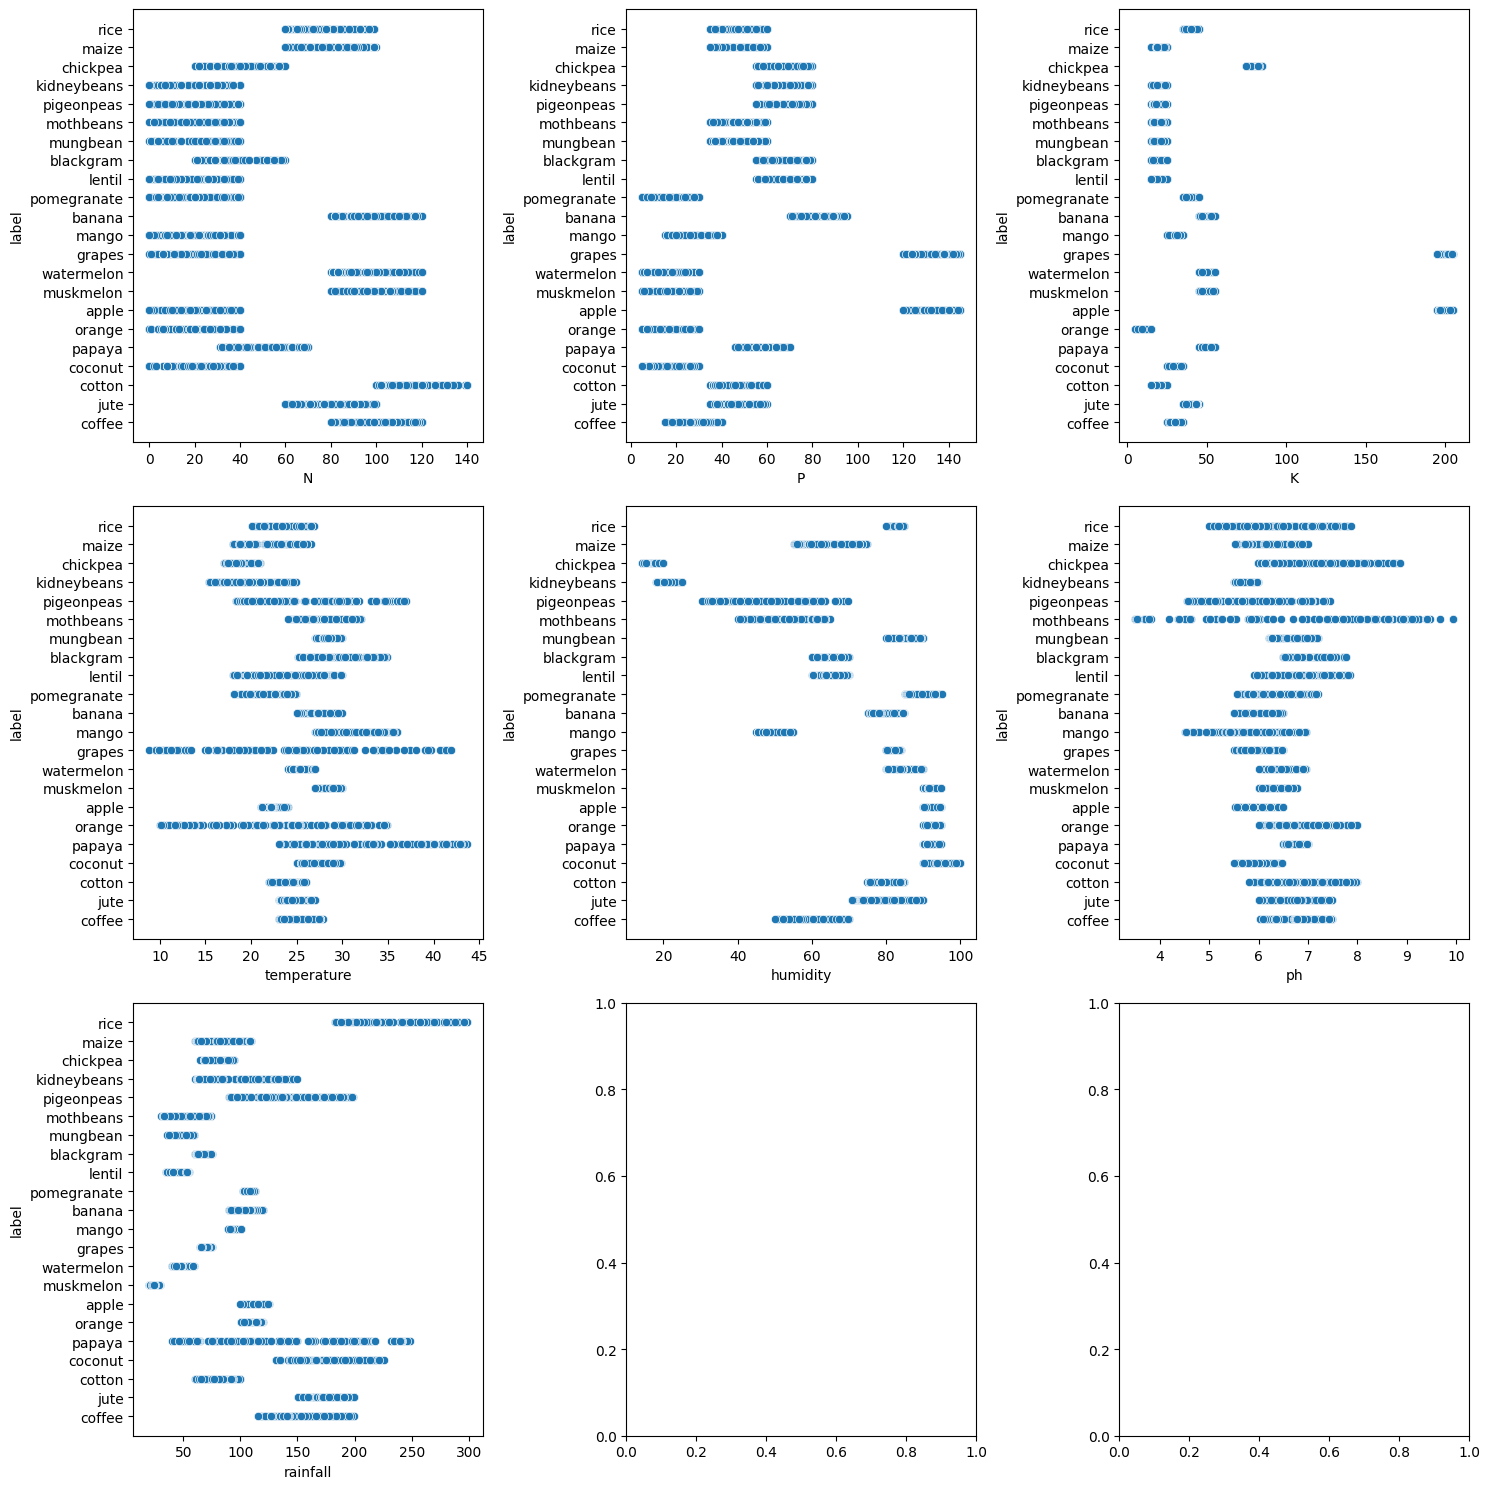


 Welcome to Koushal's Crop & Fertilizer Recommendation System 
1: Enter the Crop Name to get Environmental Requirements
2: Enter Environmental Conditions to get the best Crop & Fertilizer Recommendations
3: View Graphical Representation of Features vs Label
4: Exit the System


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

crop_data = pd.read_csv('/content/Crop_recommendation.csv')    # change this path accordingly
fertilizer_data = pd.read_csv('/content/Fertilizer Prediction.csv')   # change this path accordingly

fertilizer_data_encoded = pd.get_dummies(fertilizer_data, columns=['Soil Type', 'Crop Type'], drop_first=True)

X_fertilizer = fertilizer_data_encoded.drop(columns=['Fertilizer Name'])
y_fertilizer = fertilizer_data_encoded['Fertilizer Name']

X_train_fert, X_test_fert, y_train_fert, y_test_fert = train_test_split(X_fertilizer, y_fertilizer, test_size=0.2, random_state=42)
fertilizer_model = RandomForestClassifier(n_estimators=100, random_state=42)
fertilizer_model.fit(X_train_fert, y_train_fert)

X_crop = crop_data.drop(columns=['label'])
y_crop = crop_data['label']
X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(X_crop, y_crop, test_size=0.2, random_state=42)

crop_model = RandomForestClassifier(n_estimators=100, random_state=42)
crop_model.fit(X_train_crop, y_train_crop)

def get_user_input_type1():
    return input("\nEnter the Crop Name (e.g.,rice,maize): ").strip()

def get_user_input_type2():
    print("\n---- Enter the Environmental Conditions ----")
    n = int(input("Enter Nitrogen (N) value: "))
    p = int(input("Enter Phosphorous (P) value: "))
    k = int(input("Enter Potassium (K) value: "))
    temperature = float(input("Enter Temperature (°C): "))
    humidity = float(input("Enter Humidity (%): "))
    ph = float(input("Enter pH level: "))
    rainfall = float(input("Enter Rainfall (mm): "))
    soil_type = input("Enter Soil Type (Loamy, Sandy): ").strip()

    return n, p, k, temperature, humidity, ph, rainfall, soil_type

def type1_recommendation(crop_name):
    if crop_name not in crop_data['label'].unique():
        print(" Invalid Crop Name. Please check available crop names.")
        return

    crop_info = crop_data[crop_data['label'] == crop_name].drop(columns=['label']).select_dtypes(include=np.number).mean()

    print(f"\n Required Environmental Conditions for {crop_name}:")
    print(f" - Nitrogen (N): {crop_info['N']:.2f}")
    print(f" - Phosphorous (P): {crop_info['P']:.2f}")
    print(f" - Potassium (K): {crop_info['K']:.2f}")
    print(f" - Temperature (°C): {crop_info['temperature']:.2f}")
    print(f" - Humidity (%): {crop_info['humidity']:.2f}")
    print(f" - pH: {crop_info['ph']:.2f}")
    print(f" - Rainfall (mm): {crop_info['rainfall']:.2f}")

def type2_recommendation(n, p, k, temperature, humidity, ph, rainfall, soil_type):
    crop_input = np.array([[n, p, k, temperature, humidity, ph, rainfall]])
    crop_prediction = crop_model.predict(crop_input)[0]

    optimal_conditions = crop_data[crop_data['label'] == crop_prediction].select_dtypes(include=np.number).mean()
    suitability_score = (
        (abs(optimal_conditions['N'] - n) / optimal_conditions['N']) +
        (abs(optimal_conditions['P'] - p) / optimal_conditions['P']) +
        (abs(optimal_conditions['K'] - k) / optimal_conditions['K']) +
        (abs(optimal_conditions['temperature'] - temperature) / optimal_conditions['temperature']) +
        (abs(optimal_conditions['humidity'] - humidity) / optimal_conditions['humidity']) +
        (abs(optimal_conditions['ph'] - ph) / optimal_conditions['ph']) +
        (abs(optimal_conditions['rainfall'] - rainfall) / optimal_conditions['rainfall'])
    )
    suitability_percentage = max(0, 100 - (suitability_score * 100 / 7))

    print(f"\n Best Recommended Crop: {crop_prediction}")
    print(f" Growth Suitability accuracy: {suitability_percentage:.2f}%")

    fertilizer_input = pd.DataFrame(columns=X_fertilizer.columns)
    fertilizer_input.loc[0] = 0
    fertilizer_input.loc[0, ['N', 'P', 'K']] = [n, p, k]

    soil_encoded = f"Soil Type_{soil_type}"
    if soil_encoded in fertilizer_input.columns:
        fertilizer_input.loc[0, soil_encoded] = 1

    fertilizer_input = fertilizer_input.reindex(columns=X_fertilizer.columns, fill_value=0)
    fertilizer_prediction = fertilizer_model.predict(fertilizer_input)[0]
    print(f" Recommended Fertilizer: {fertilizer_prediction}")

def plot_features_vs_label():
    features = crop_data.drop(columns='label').columns
    fig, ax = plt.subplots(3, 3, figsize=(15, 15))
    for i, subplot in zip(features, ax.flatten()):
        sns.scatterplot(x=i, y='label', data=crop_data, ax=subplot)
    plt.tight_layout()
    plt.show()

while True:
    print("\n Welcome to Koushal's Crop & Fertilizer Recommendation System ")
    print("1: Enter the Crop Name to get Environmental Requirements")
    print("2: Enter Environmental Conditions to get the best Crop & Fertilizer Recommendations")
    print("3: View Graphical Representation of Features vs Label")
    print("4: Exit the System")
    choice = int(input("\nEnter your choice (1, 2, 3, or 4): "))

    if choice == 1:
        crop_name = get_user_input_type1()
        type1_recommendation(crop_name)
    elif choice == 2:
        n, p, k, temperature, humidity, ph, rainfall, soil_type = get_user_input_type2()
        type2_recommendation(n, p, k, temperature, humidity, ph, rainfall, soil_type)
    elif choice == 3:
        plot_features_vs_label()
    elif choice == 4:
        print(" Thank you.Visit again")
        break
    else:
        print(" Invalid choice. Please enter 1, 2, 3, or 4.")
